In [2]:
import pandas as pd

EDA

In [42]:
df = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [20]:
df['Drained_after_socializing'].unique()

array(['No', 'No answer', 'Yes'], dtype=object)

/tmp/ipykernel_36/3601157852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipykernel_36/3601157852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipykernel_36/3601157852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipykernel_36/3601157852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipykernel_36/3601157852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipykernel_36/3601157852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

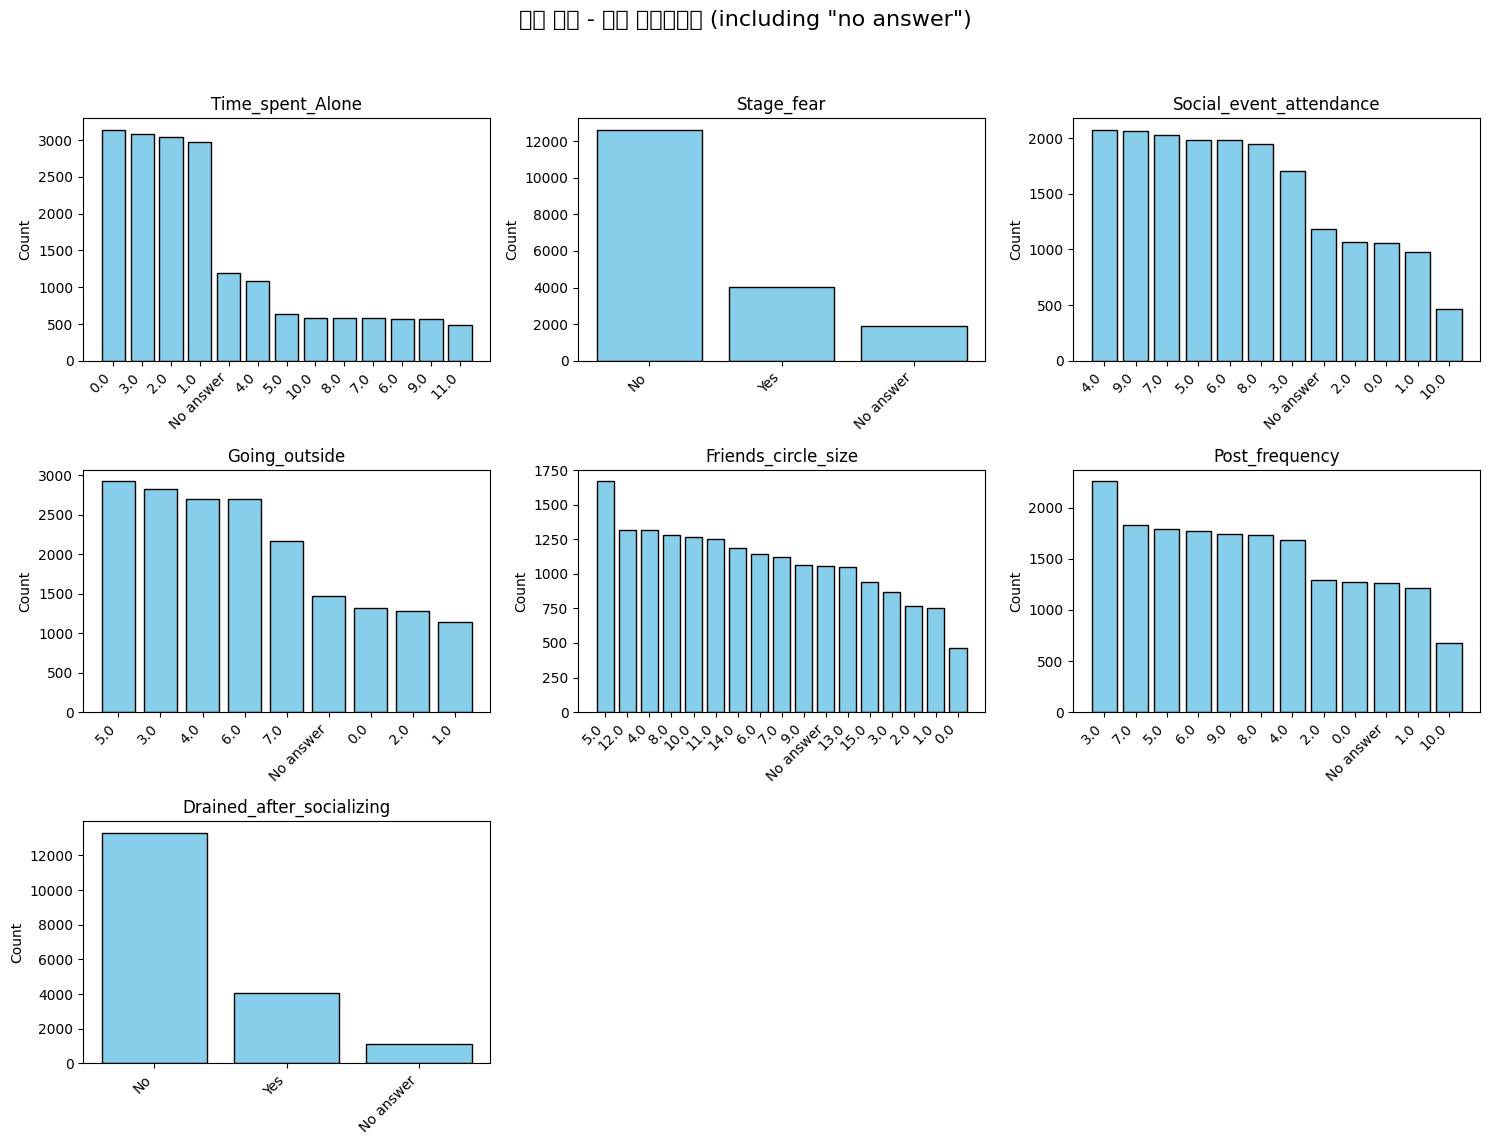

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('모든 변수 - 빈도 막대그래프 (including "no answer")', fontsize=16)

variables = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
    'Going_outside', 'Friends_circle_size', 'Post_frequency',
    'Drained_after_socializing'
]

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]
    
    series = df[var].astype(str)  # 수치형도 문자열로 처리
    value_counts = series.value_counts()

    # 막대그래프 그리기
    ax.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    ax.set_title(var)
    ax.set_ylabel("Count")
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

# 빈 plot 제거
for i in range(len(variables), 9):
    fig.delaxes(axs[i // 3, i % 3])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288

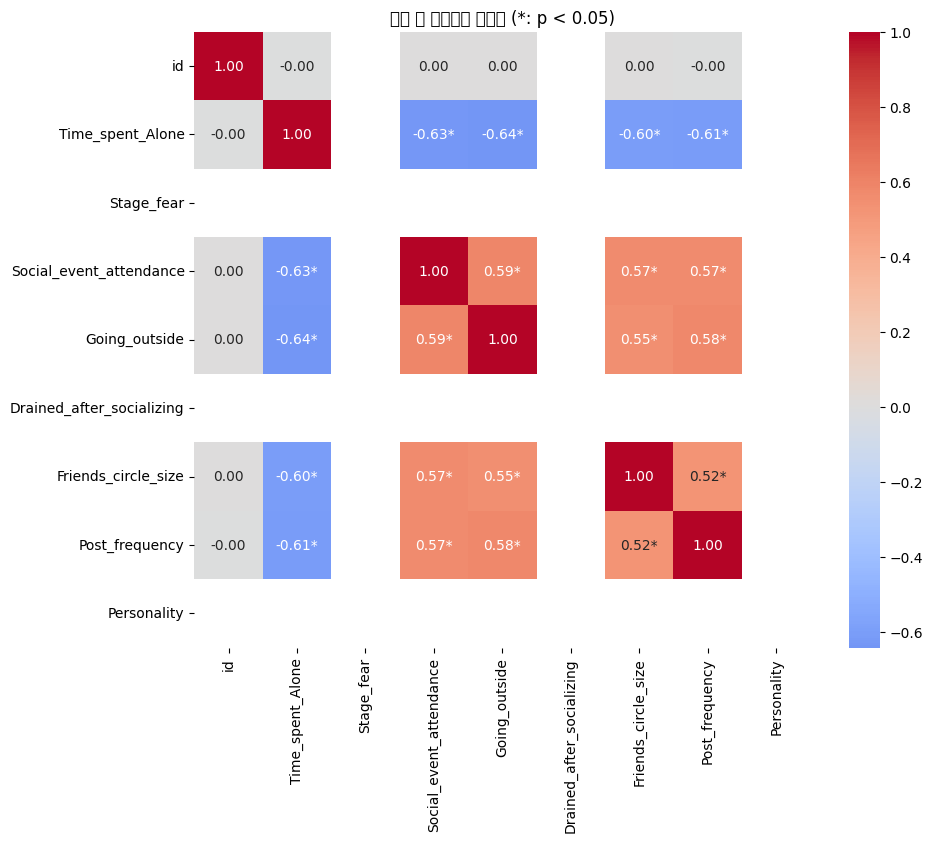

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import platform
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:  # Linux or Colab
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 1. 'no answer' → NaN으로 다시 변환
df_numeric = df.replace('no answer', pd.NA)

# 2. 수치형 컬럼만 선택
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
numeric_cols = df_numeric.select_dtypes(include='number').columns

# 3. 상관계수 및 p-value 계산
corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=float)
p_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=float)
annot_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=str)

for i in numeric_cols:
    for j in numeric_cols:
        x = df_numeric[i]
        y = df_numeric[j]
        valid = x.notna() & y.notna()
        if valid.sum() > 2:
            r, p = pearsonr(x[valid], y[valid])
            corr_matrix.loc[i, j] = r
            p_matrix.loc[i, j] = p
            star = '*' if p < 0.05 and i != j else ''
            annot_matrix.loc[i, j] = f"{r:.2f}{star}"
        else:
            corr_matrix.loc[i, j] = np.nan
            p_matrix.loc[i, j] = np.nan
            annot_matrix.loc[i, j] = ""

# 4. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float),
            annot=annot_matrix,
            fmt='',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Pearson 상관계수'})
plt.title("변수 간 상관관계 히트맵 (*: p < 0.05)")
plt.tight_layout()
plt.show()

In [58]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. 범주형 변수 확률 기반 대체
# -----------------------------
def impute_categorical_by_probability(series):
    series_clean = series.replace('no answer', np.nan)
    value_probs = series_clean.value_counts(normalize=True)

    na_index = series_clean[series_clean.isna()].index
    if len(value_probs) == 0 or len(na_index) == 0:
        return series  # 대체 불가능한 경우

    imputed = np.random.choice(value_probs.index, size=len(na_index), p=value_probs.values)
    filled_series = series.copy()
    filled_series.loc[na_index] = imputed

    return filled_series

# -----------------------------
# 2. 수치형 변수 분포 기반 대체
# -----------------------------
def impute_numeric_by_empirical_distribution(series):
    series_clean = pd.to_numeric(series, errors='coerce')
    observed = series_clean.dropna()

    na_index = series_clean[series_clean.isna()].index
    if len(observed) == 0 or len(na_index) == 0:
        return series  # 대체 불가능한 경우

    imputed = np.random.choice(observed.values, size=len(na_index), replace=True)
    filled_series = series.copy()
    filled_series.loc[na_index] = imputed

    return filled_series

# -----------------------------
# 3. 통합 적용 함수
# -----------------------------
def impute_dataframe(df):
    df_new = df.copy()
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        if df[col].dtype == object or set(unique_vals).issubset({'Yes', 'No', 'no answer', '예', '아니오', 'introvert', 'extrovert'}):
            df_new[col + '_imputed'] = impute_categorical_by_probability(df[col])
        else:
            df_new[col + '_imputed'] = impute_numeric_by_empirical_distribution(df[col])
    return df_new

ANALYSIS

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# -----------------------------
# 1. 범주형 변수 확률 기반 대체
# -----------------------------
def impute_categorical_by_probability(series):
    value_probs = series.value_counts(normalize=True)

    na_index = series[series.isna()].index
    if len(value_probs) == 0 or len(na_index) == 0:
        return series  # 대체 불가능한 경우

    imputed = np.random.choice(value_probs.index, size=len(na_index), p=value_probs.values)
    filled_series = series.copy()
    filled_series.loc[na_index] = imputed

    return filled_series

# -----------------------------
# 2. 수치형 변수 분포 기반 대체
# -----------------------------
def impute_numeric_by_empirical_distribution(series):
    series_clean = pd.to_numeric(series, errors='coerce')
    observed = series_clean.dropna()

    na_index = series_clean[series_clean.isna()].index
    if len(observed) == 0 or len(na_index) == 0:
        return series  # 대체 불가능한 경우

    imputed = np.random.choice(observed.values, size=len(na_index), replace=True)
    filled_series = series.copy()
    filled_series.loc[na_index] = imputed

    return filled_series

# -----------------------------
# 3. 통합 적용 함수
# -----------------------------
def impute_dataframe(df):
    df_new = df.copy()
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        if df[col].dtype == object or set(unique_vals).issubset({'Yes', 'No', 'no answer', '예', '아니오', 'introvert', 'extrovert'}):
            df_new[col + '_imputed'] = impute_categorical_by_probability(df[col])
        else:
            df_new[col + '_imputed'] = impute_numeric_by_empirical_distribution(df[col])
    return df_new

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# train과 test 데이터 준비
train = impute_dataframe(train)
test = impute_dataframe(test)

# 확인
print("Train 결측치 수:", train.isna().sum())
print("Test 결측치 수:", test.isna().sum())

Train 결측치 수: id                                      0
Time_spent_Alone                     1190
Stage_fear                           1893
Social_event_attendance              1180
Going_outside                        1466
Drained_after_socializing            1149
Friends_circle_size                  1054
Post_frequency                       1264
Personality                             0
id_imputed                              0
Time_spent_Alone_imputed                0
Stage_fear_imputed                      0
Social_event_attendance_imputed         0
Going_outside_imputed                   0
Drained_after_socializing_imputed       0
Friends_circle_size_imputed             0
Post_frequency_imputed                  0
Personality_imputed                     0
dtype: int64
Test 결측치 수: id                                     0
Time_spent_Alone                     425
Stage_fear                           598
Social_event_attendance              397
Going_outside                        466
D

In [4]:
# ✅ Personality: 예측 대상 (introvert: 0, extrovert: 1)
train['Personality_binary'] = train['Personality_imputed'].map({'Extrovert': 1, 'Introvert': 0})
y = train['Personality_binary']

# ✅ 수치형 변수 리스트
numeric_cols = [
    'Time_spent_Alone_imputed',
    'Social_event_attendance_imputed',
    'Going_outside_imputed',
    'Friends_circle_size_imputed',
    'Post_frequency_imputed'
]

# ✅ 범주형 변수 리스트
binary_cols = [
    'Stage_fear_imputed',
    'Drained_after_socializing_imputed'
]

# ✅ 범주형 인코딩: 예 → 1, 아니오 → 0
train_encoded = train.copy()
test_encoded = test.copy()
for col in binary_cols:
    train_encoded[col] = train_encoded[col].map({'Yes': 1, 'No': 0})
    test_encoded[col] = test_encoded[col].map({'Yes': 1, 'No': 0})

# ✅ 결측값 확인 (이상치 없도록)
print(train_encoded[binary_cols].isna().sum())
print(test_encoded[binary_cols].isna().sum())

# ✅ 피처 결합
x_train_full_raw = pd.concat([
    train_encoded[numeric_cols].apply(pd.to_numeric, errors='coerce'),
    train_encoded[binary_cols]
], axis=1)
x_test_full_raw = pd.concat([
    test_encoded[numeric_cols].apply(pd.to_numeric, errors='coerce'),
    test_encoded[binary_cols]
], axis=1)

# ✅ 스케일링 (수치형에만 MinMax 적용)
scaler = MinMaxScaler()
x_train_full_scaled = scaler.fit_transform(x_train_full_raw)
x_test_full_scaled = scaler.fit_transform(x_test_full_raw)

# ✅ Train/Test 분할 기준
n = len(test)
split_idx = int(n * 0.7)
x_train_full = x_train_full_scaled[:split_idx]
x_test = x_train_full_scaled[split_idx:]
y_train_full = y[:split_idx]
y_test_final = y[split_idx:]

# ✅ Train/Validation 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# ✅ 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# ✅ 검증
y_val_pred = model.predict(x_val)
y_val_proba = model.predict_proba(x_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
acc = accuracy_score(y_val, y_val_pred)

print(f"\n✅ Validation ROC-AUC: {roc_auc:.4f}")
print(f"✅ Validation Accuracy: {acc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_val, y_val_pred))

Stage_fear_imputed                   0
Drained_after_socializing_imputed    0
dtype: int64
Stage_fear_imputed                   0
Drained_after_socializing_imputed    0
dtype: int64

✅ Validation ROC-AUC: 0.9686
✅ Validation Accuracy: 0.9688

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       233
           1       0.98      0.98      0.98       632

    accuracy                           0.97       865
   macro avg       0.96      0.96      0.96       865
weighted avg       0.97      0.97      0.97       865



In [7]:
# ✅ 최종 예측
y_pred = model.predict(x_test_full_scaled)

# ✅ 0/1을 'Introvert' / 'Extrovert'로 변환
personality_pred = pd.Series(y_pred).map({0: 'Introvert', 1: 'Extrovert'})

# ✅ 결과 DataFrame 구성: id + 예측 성격
result = pd.DataFrame({
    'id': test['id'],
    'personality': personality_pred
})

result.head()

,id,personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [8]:
# ✅ CSV 저장
result.to_csv('result.csv', index=False)

df2 = pd.read_csv('result.csv')
print(df2.head())

      id personality
0  18524   Extrovert
1  18525   Introvert
2  18526   Extrovert
3  18527   Extrovert
4  18528   Introvert
